In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import webbrowser
from ipywidgets import interact
import sympy as sp
from sklearn.preprocessing import MinMaxScaler
import qgrid

In [3]:
ammo=pd.read_csv('ammo.csv')

In [4]:
ammo

,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%),子彈種類,取得方式,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.7x108 mm B-32,0.133,820.0,182.0,0.0,0.0,88.0,1.0,818.0,0.750,0.380,0.170,88.0,NaN,NaN,NaN,NaN
2,12.7x108 mm BZT-44M,0.128,980.0,199.0,0.0,0.0,80.0,1.0,818.0,0.750,0.380,0.170,95.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.7x55 mm PS12,0.070,340.0,115.0,0.0,0.0,25.0,1.0,285.0,0.600,0.400,0.300,60.0,NaN,NaN,NaN,NaN
5,12.7x55 mm PS12A,0.044,280.0,155.0,-15.0,7.0,8.0,1.0,290.0,0.100,0.200,0.700,17.0,NaN,NaN,NaN,NaN
6,12.7x55 mm PS12B,0.055,455.0,90.0,0.0,15.0,40.0,1.0,300.0,0.800,0.650,0.300,57.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12/70 7mm Buckshot,0.050,30.0,32.0,0.0,0.0,3.0,8.0,415.0,0.020,0.000,0.000,26.0,NaN,NaN,NaN,NaN
9,12/70 5.25mm Buckshot,0.044,35.0,17.0,0.0,0.0,1.0,15.0,330.0,0.020,0.000,0.000,15.0,NaN,NaN,NaN,NaN


In [5]:
new_ammo=ammo.drop(["Unnamed: 15",'Unnamed: 16','子彈種類','取得方式'],axis=1)

In [6]:
str_choice = "5.56|5.45|7.62x39"
loc=new_ammo[new_ammo['子彈'].str.contains(str_choice, na=False)] ###挑出常用的步槍子彈

In [7]:
loc

,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%)
43,"5.45x39 mm 7N39 ""Igolnik""",0.011,562.0,37.0,0.0,15.0,62.0,1.0,905.0,0.800,0.380,0.0200,60.0
44,5.45x39 mm BP,0.010,129.0,42.0,0.0,0.0,32.0,1.0,890.0,0.720,0.360,0.1600,38.0
45,5.45x39 mm BS,0.010,380.0,40.0,0.0,0.0,50.0,1.0,830.0,0.750,0.380,0.1700,57.0
46,5.45x39 mm BT,0.010,240.0,44.0,0.0,0.0,33.0,1.0,880.0,0.660,0.370,0.1640,52.0
47,5.45x39 mm FMJ,0.010,36.0,54.0,0.0,0.0,18.0,1.0,884.0,0.510,0.260,0.2500,44.0
48,5.45x39 mm HP,0.010,68.0,73.0,0.0,0.0,11.0,1.0,884.0,0.480,0.200,0.3500,32.0
49,5.45x39 mm PP,0.010,108.0,46.0,0.0,0.0,27.0,1.0,890.0,0.660,0.380,0.1700,50.0
50,5.45x39 mm PRS,0.010,46.0,60.0,0.0,0.0,14.0,1.0,890.0,0.510,0.040,0.3000,34.0
51,5.45x39 mm PS,0.010,74.0,50.0,0.0,0.0,23.0,1.0,890.0,0.700,0.400,0.4000,47.0
52,5.45x39 mm SP,0.010,60.0,68.0,0.0,0.0,11.0,1.0,873.0,0.400,0.150,0.4500,34.0


In [8]:
new_ammo.to_csv('new_ammo.csv',encoding='utf_8_sig')

In [9]:
priceSort=loc.sort_values(by=['價格(盧布)', '傷害','穿甲'], ascending=False) ###挑選影響子彈的最主要幾項資料進行排序

In [10]:
priceSort

,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%)
43,"5.45x39 mm 7N39 ""Igolnik""",0.011,562.0,37.0,0.0,15.0,62.0,1.0,905.0,0.800,0.380,0.0200,60.0
45,5.45x39 mm BS,0.010,380.0,40.0,0.0,0.0,50.0,1.0,830.0,0.750,0.380,0.1700,57.0
62,5.56x45 mm M995,0.012,345.0,42.0,0.0,0.0,53.0,1.0,1013.0,0.600,0.360,0.3200,57.0
82,7.62x39 mm BP,0.010,299.0,50.0,0.0,0.0,45.0,1.0,730.0,0.840,0.315,0.1200,65.0
46,5.45x39 mm BT,0.010,240.0,44.0,0.0,0.0,33.0,1.0,880.0,0.660,0.370,0.1640,52.0
61,5.56x45 mm M856A1,0.012,182.0,56.0,0.0,0.0,34.0,1.0,940.0,0.550,0.380,0.3280,45.0
64,5.56x45mm Warmage,0.011,156.0,83.0,10.0,10.0,3.0,1.0,910.0,0.200,0.050,0.9000,14.0
59,5.56x45 mm M855A1,0.012,142.0,57.0,0.0,0.0,31.0,1.0,945.0,0.550,0.380,0.3400,42.0
63,5.56x45 mm Mk 255 Mod 0,0.012,135.0,60.0,0.0,0.0,17.0,1.0,936.0,0.200,0.100,0.0300,32.0
86,7.62x39 mm US,0.010,134.0,68.0,0.0,0.0,19.0,1.0,300.0,0.520,0.358,0.0750,41.0


In [11]:
str_choice = "5.45"
loc_545=new_ammo[new_ammo['子彈'].str.contains(str_choice, na=False)] ###挑出5.45的步槍子彈

In [12]:
loc_545

,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%)
43,"5.45x39 mm 7N39 ""Igolnik""",0.011,562.0,37.0,0.0,15.0,62.0,1.0,905.0,0.80,0.38,0.020,60.0
44,5.45x39 mm BP,0.010,129.0,42.0,0.0,0.0,32.0,1.0,890.0,0.72,0.36,0.160,38.0
45,5.45x39 mm BS,0.010,380.0,40.0,0.0,0.0,50.0,1.0,830.0,0.75,0.38,0.170,57.0
46,5.45x39 mm BT,0.010,240.0,44.0,0.0,0.0,33.0,1.0,880.0,0.66,0.37,0.164,52.0
47,5.45x39 mm FMJ,0.010,36.0,54.0,0.0,0.0,18.0,1.0,884.0,0.51,0.26,0.250,44.0
48,5.45x39 mm HP,0.010,68.0,73.0,0.0,0.0,11.0,1.0,884.0,0.48,0.20,0.350,32.0
49,5.45x39 mm PP,0.010,108.0,46.0,0.0,0.0,27.0,1.0,890.0,0.66,0.38,0.170,50.0
50,5.45x39 mm PRS,0.010,46.0,60.0,0.0,0.0,14.0,1.0,890.0,0.51,0.04,0.300,34.0
51,5.45x39 mm PS,0.010,74.0,50.0,0.0,0.0,23.0,1.0,890.0,0.70,0.40,0.400,47.0
52,5.45x39 mm SP,0.010,60.0,68.0,0.0,0.0,11.0,1.0,873.0,0.40,0.15,0.450,34.0


In [13]:
loc_545["穿甲"].mean()

26.333333333333332

In [14]:
loc_545["穿甲"].quantile(.0)

11.0

In [15]:
loc_545["穿甲"].quantile(.25)

14.75

In [16]:
loc_545["穿甲"].quantile(.5)

21.5

In [17]:
loc_545["穿甲"].quantile(.75)

32.25

In [18]:
loc_545["穿甲"].quantile(1)

62.0

In [19]:
loc_545[new_ammo.穿甲>21.5] ### 穿甲大於21.5的子彈才有意義

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%)
43,"5.45x39 mm 7N39 ""Igolnik""",0.011,562.0,37.0,0.0,15.0,62.0,1.0,905.0,0.80,0.38,0.020,60.0
44,5.45x39 mm BP,0.010,129.0,42.0,0.0,0.0,32.0,1.0,890.0,0.72,0.36,0.160,38.0
45,5.45x39 mm BS,0.010,380.0,40.0,0.0,0.0,50.0,1.0,830.0,0.75,0.38,0.170,57.0
46,5.45x39 mm BT,0.010,240.0,44.0,0.0,0.0,33.0,1.0,880.0,0.66,0.37,0.164,52.0
49,5.45x39 mm PP,0.010,108.0,46.0,0.0,0.0,27.0,1.0,890.0,0.66,0.38,0.170,50.0
51,5.45x39 mm PS,0.010,74.0,50.0,0.0,0.0,23.0,1.0,890.0,0.70,0.40,0.400,47.0


In [20]:
op_labels = ['Terrible',"Okay", 'Moderate', 'Good']
category = [10.99,14.74,21.49,32.24,62]   ### 運用四分位數做分類依據
loc_545['穿甲品質'] = pd.cut(loc_545['穿甲'], labels=op_labels, bins=category, include_lowest=False) ### 幫子彈的穿甲品質做分類
loc_545

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%),穿甲品質
43,"5.45x39 mm 7N39 ""Igolnik""",0.011,562.0,37.0,0.0,15.0,62.0,1.0,905.0,0.80,0.38,0.020,60.0,Good
44,5.45x39 mm BP,0.010,129.0,42.0,0.0,0.0,32.0,1.0,890.0,0.72,0.36,0.160,38.0,Moderate
45,5.45x39 mm BS,0.010,380.0,40.0,0.0,0.0,50.0,1.0,830.0,0.75,0.38,0.170,57.0,Good
46,5.45x39 mm BT,0.010,240.0,44.0,0.0,0.0,33.0,1.0,880.0,0.66,0.37,0.164,52.0,Good
47,5.45x39 mm FMJ,0.010,36.0,54.0,0.0,0.0,18.0,1.0,884.0,0.51,0.26,0.250,44.0,Okay
48,5.45x39 mm HP,0.010,68.0,73.0,0.0,0.0,11.0,1.0,884.0,0.48,0.20,0.350,32.0,Terrible
49,5.45x39 mm PP,0.010,108.0,46.0,0.0,0.0,27.0,1.0,890.0,0.66,0.38,0.170,50.0,Moderate
50,5.45x39 mm PRS,0.010,46.0,60.0,0.0,0.0,14.0,1.0,890.0,0.51,0.04,0.300,34.0,Terrible
51,5.45x39 mm PS,0.010,74.0,50.0,0.0,0.0,23.0,1.0,890.0,0.70,0.40,0.400,47.0,Moderate
52,5.45x39 mm SP,0.010,60.0,68.0,0.0,0.0,11.0,1.0,873.0,0.40,0.15,0.450,34.0,Terrible


In [26]:
K=loc_545.style.bar(subset=["價格(盧布)"],vmin=0, color='lightgreen')\
                 .bar(subset=["傷害"],vmin=0, color='#ee1f5f')\
                 .bar(subset=["穿甲"],vmin=0, color='#FFA07A')
                 

In [27]:
K

,子彈,重量 (KG),價格(盧布),傷害,精準度 (%),後座力 (%),穿甲,彈丸數量,子彈初速 (m/s),穿透機率,跳彈機率,碎裂機率,護甲傷害 (%),穿甲品質
43,"5.45x39 mm 7N39 ""Igolnik""",0.011,562,37,0,15,62,1,905,0.8,0.38,0.02,60,Good
44,5.45x39 mm BP,0.01,129,42,0,0,32,1,890,0.72,0.36,0.16,38,Moderate
45,5.45x39 mm BS,0.01,380,40,0,0,50,1,830,0.75,0.38,0.17,57,Good
46,5.45x39 mm BT,0.01,240,44,0,0,33,1,880,0.66,0.37,0.164,52,Good
47,5.45x39 mm FMJ,0.01,36,54,0,0,18,1,884,0.51,0.26,0.25,44,Okay
48,5.45x39 mm HP,0.01,68,73,0,0,11,1,884,0.48,0.2,0.35,32,Terrible
49,5.45x39 mm PP,0.01,108,46,0,0,27,1,890,0.66,0.38,0.17,50,Moderate
50,5.45x39 mm PRS,0.01,46,60,0,0,14,1,890,0.51,0.04,0.3,34,Terrible
51,5.45x39 mm PS,0.01,74,50,0,0,23,1,890,0.7,0.4,0.4,47,Moderate
52,5.45x39 mm SP,0.01,60,68,0,0,11,1,873,0.4,0.15,0.45,34,Terrible


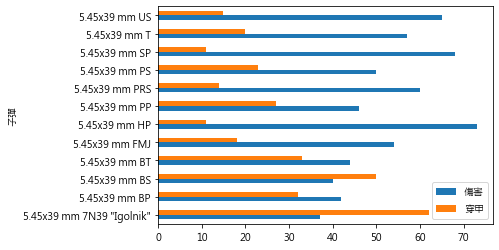

In [22]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'];  ###讓他正常顯示繁中
loc_545.plot(x='子彈',y=['傷害','穿甲'],kind='barh');

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…